### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn import tree

%matplotlib inline

import warnings
warnings.filterwarnings('ignore') 

### Import Data

In [3]:
Loandf = pd.read_csv("LoanPrediction.csv")
Loandf.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Exploratory Data Analysis

Basic Information

In [4]:
Loandf.shape

(614, 13)

In [5]:
Loandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
Loandf.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Check Duplicate

In [7]:
Loandf.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 614, dtype: bool

In [8]:
Loandf.duplicated().sum()

0

Check Unique value

In [9]:
Loandf.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

Drop unimportant column

In [10]:
Loandf = Loandf.drop("Loan_ID", axis = 1)
Loandf.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Check Missing Value

In [11]:
Loandf.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Feature Engineering

##### Imputation

Replace Missing Value with the Most Frequent Value

In [12]:
Loandf['Gender'].fillna(Loandf['Gender'].mode()[0],inplace=True)
Loandf['Married'].fillna(Loandf['Married'].mode()[0],inplace=True)
Loandf['Dependents'].fillna(Loandf['Dependents'].mode()[0],inplace=True)
Loandf['Self_Employed'].fillna(Loandf['Self_Employed'].mode()[0],inplace=True)
Loandf['LoanAmount'].fillna(Loandf['LoanAmount'].mode()[0],inplace=True)
Loandf['Loan_Amount_Term'].fillna(Loandf['Loan_Amount_Term'].mode()[0],inplace=True)
Loandf['Credit_History'].fillna(Loandf['Credit_History'].mode()[0],inplace=True)

In [13]:
Loandf

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


#### Label Encoding

Change categorical to numeric

In [14]:
#from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in Loandf.columns:
    if Loandf[col].dtype == 'object':
        Loandf[col] = le.fit_transform(Loandf[col])

In [15]:
Loandf

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [16]:
#Gender => 0 = Female, 1 = Male
#Married => 0 = No, 1 = Yes
#Education => 0 = Graduate, 1 = Not Graduate
#Self_Employed => 0 = No, 1 = Yes
#Property_Area => 0 = Rural, 1 = Semiurban, 2 = Urban
#Loan_Status => 0 = No, 1 = Yes

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

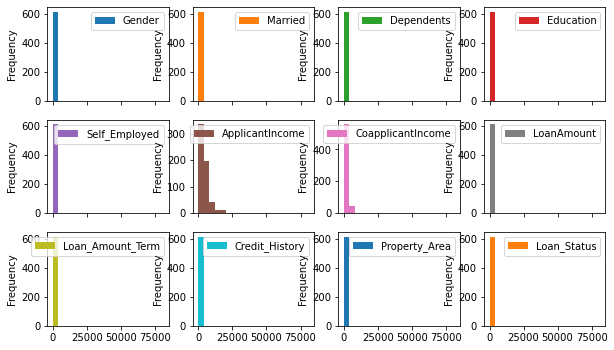

In [17]:
Loandf.plot.hist(subplots=True, layout=(5,4), figsize=(10, 10), bins=20)

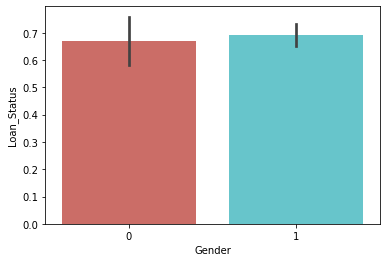

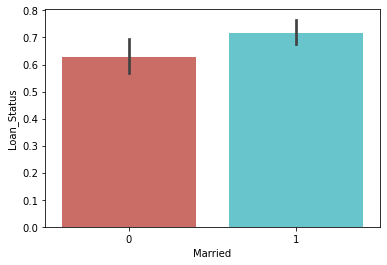

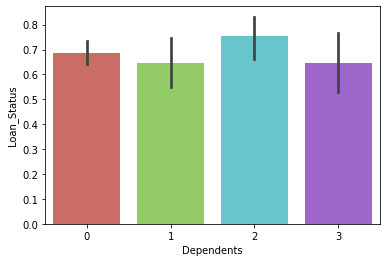

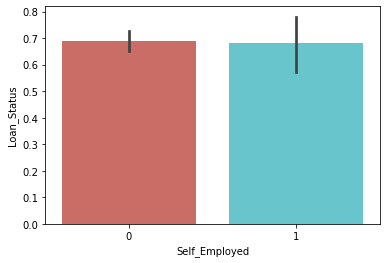

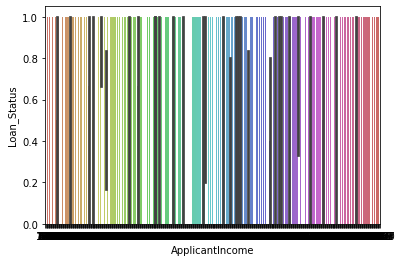

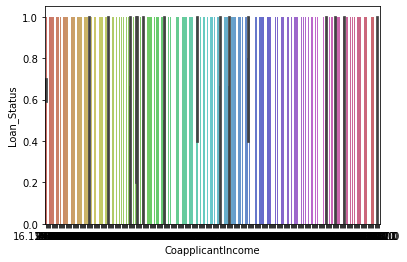

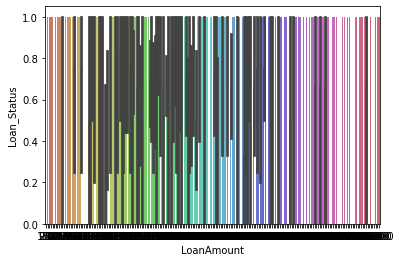

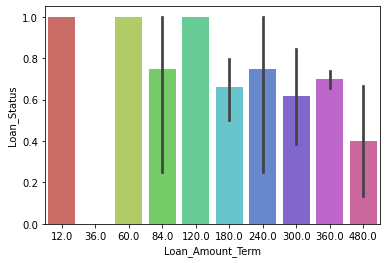

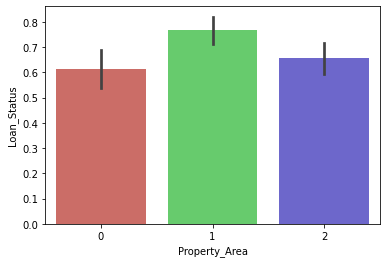

In [18]:
sns.barplot(data= Loandf, x = 'Gender', y = 'Loan_Status', palette='hls')
plt.show()

sns.barplot(data= Loandf, x = 'Married', y = 'Loan_Status', palette='hls')
plt.show()

sns.barplot(data= Loandf, x = 'Dependents', y = 'Loan_Status', palette='hls')
plt.show()

sns.barplot(data= Loandf, x = 'Self_Employed', y = 'Loan_Status', palette='hls')
plt.show()

sns.barplot(data= Loandf, x = 'ApplicantIncome', y = 'Loan_Status', palette='hls')
plt.show()

sns.barplot(data= Loandf, x = 'CoapplicantIncome', y = 'Loan_Status', palette='hls')
plt.show()

sns.barplot(data= Loandf, x = 'LoanAmount', y = 'Loan_Status', palette='hls')
plt.show()

sns.barplot(data= Loandf, x = 'Loan_Amount_Term', y = 'Loan_Status', palette='hls')
plt.show()

sns.barplot(data= Loandf, x = 'Property_Area', y = 'Loan_Status', palette='hls')
plt.show()

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

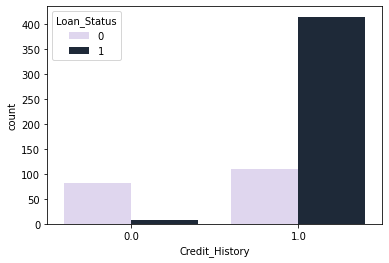

In [23]:
sns.countplot(x='Credit_History',hue='Loan_Status',data=Loandf,  palette = "ch:s=-.3,r=.17")

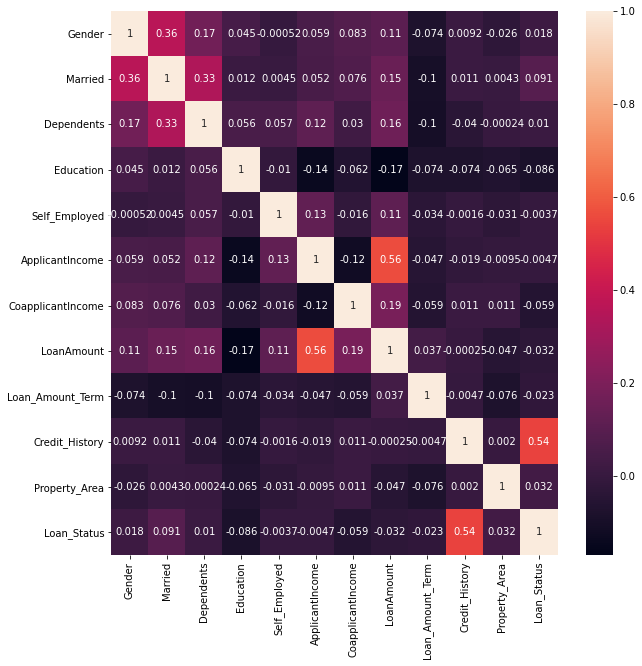

In [24]:
ax,fig = plt.subplots(figsize=(10,10))
data= Loandf.corr()
sns.heatmap(data, annot=True)
plt.show()

#### Find Value Counts

In [25]:
Loandf['Gender'].value_counts()

1    502
0    112
Name: Gender, dtype: int64

In [26]:
Loandf['Married'].value_counts()

1    401
0    213
Name: Married, dtype: int64

In [27]:
Loandf['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [28]:
Loandf['Education'].value_counts()

0    480
1    134
Name: Education, dtype: int64

In [29]:
Loandf['Self_Employed'].value_counts()

0    532
1     82
Name: Self_Employed, dtype: int64

In [30]:
Loandf['ApplicantIncome'].value_counts()

2500    9
6000    6
2600    6
4583    6
4166    5
       ..
5503    1
3450    1
2425    1
2423    1
4095    1
Name: ApplicantIncome, Length: 505, dtype: int64

In [31]:
Loandf['CoapplicantIncome'].value_counts()

0.0       273
2500.0      5
2083.0      5
1666.0      5
1625.0      3
         ... 
2365.0      1
1695.0      1
2466.0      1
2375.0      1
1700.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64

In [32]:
Loandf['LoanAmount'].value_counts()

120.0    42
110.0    17
100.0    15
160.0    12
187.0    12
         ..
211.0     1
250.0     1
62.0      1
85.0      1
436.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [33]:
Loandf['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [34]:
Loandf['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [35]:
Loandf['Property_Area'].value_counts()

1    233
2    202
0    179
Name: Property_Area, dtype: int64

In [ ]:
Loandf['Loan_Status'].value_counts()

#### Creating Feature

In [ ]:
for i in [Loandf]:
    i["TotalIncome"] = i["ApplicantIncome"] + i["CoapplicantIncome"]

#### Find Outliers

In [ ]:
Loandf

In [ ]:
def find_outliers_IQR(Loandf):
   q1 = Loandf.quantile(0.25)
   q3 = Loandf.quantile(0.75)
   IQR = q3-q1
   outliers = Loandf[((Loandf<(q1-1.5*IQR)) | (Loandf>(q3+1.5*IQR)))]
   return outliers

In [ ]:
outliers = find_outliers_IQR(Loandf['TotalIncome'])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

#### Check Label

In [ ]:
# Create Classification version of target variable
x = Loandf.drop(['Loan_Status'], axis = 1)
y = Loandf['Loan_Status']

#### Scaling

In [ ]:
#from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit_transform(x)

# Train machine learning models & Evaluate machine learning models

In [ ]:
#from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=128)

# see train and test dataset shape
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)

print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

## K-Nearest Neighbors

In [ ]:
#from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(x_train, y_train)

In [ ]:
#Prediction
prediksi_knn = knn.predict(x_test)
prediksi_knn

In [ ]:
# Print the accuracy
print(knn.score(x_test, y_test))

In [ ]:
print(classification_report(y_test, prediksi_knn))

## Logistic Regression 

In [ ]:
#from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
lrR = classification_report(lr_pred, y_test)

print(lrR)

## Desicion Tree

In [ ]:
#from sklearn.tree import DecisionTreeClassifier
#from sklearn import tree
dt = DecisionTreeClassifier()

dt.fit(x_train,y_train)

In [ ]:
#Predict
prediksi_dt = dt.predict(x_test)
print(prediksi_dt)

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   filled=True)

In [ ]:
print(classification_report(y_test, prediksi_dt))

## Naive Bayes

In [ ]:
#from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

In [ ]:
#Predict
prediksi_nb = gnb.predict(x_test)
print(prediksi_nb)

In [ ]:
print(classification_report(y_test, prediksi_nb))

## Random Forest

In [ ]:
#from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(x_train, y_train)

In [ ]:
#Predict
prediksi_rf = rf.predict(x_test)
print(prediksi_rf)

In [ ]:
yp = (prediksi_rf >= 0.5).astype(int)
yp

In [ ]:
print(classification_report(y_test, yp))

In [ ]:
data = [['KNN', 0.6178861788617886, 0.7513227513227515, 0.6826923076923077, 0.8352941176470589],  
                ['Logistic Regression', 0.6910569105691057, 0.8173076923076924, 0.6910569105691057, 1.0], 
                ['Decision Tree', 0.7560975609756098, 0.8192771084337349, 0.8395061728395061, 0.8],
                ['Gaussian Naive Bayes', 0.8048780487804879, 0.8736842105263157, 0.7904761904761904, 0.9764705882352941], 
                ['Random Forest', 0.8130081300813008, 0.8700564971751413, 0.8369565217391305, 0.9058823529411765]]
df = pd.DataFrame(data, columns = ['Method','Accuracy','F1', 'Precision', 'Recall'])
df

Random forest for feature importance on a regression problem

In [ ]:
importance = rf.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], importance, color = 'purple')
plt.show()